In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,InputLayer,Flatten

In [3]:
(Xtrain,ytrain), (Xtest,ytest) = keras.datasets.mnist.load_data()

In [5]:
Xtrain.shape

(60000, 28, 28)

In [7]:
Xtrain[:2]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [8]:
ytrain.shape

(60000,)

In [9]:
ytrain[:2]

array([5, 0], dtype=uint8)

In [10]:
Xtest.shape

(10000, 28, 28)

In [11]:
ytest.shape

(10000,)

In [12]:
def plot_digit(X,y,i):
    plt.figure(figsize=(8,4))
    plt.imshow(X[i])
    plt.xlabel(y[i])

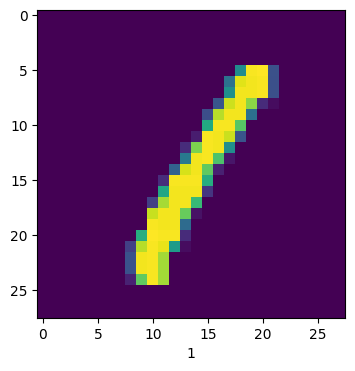

In [14]:
plot_digit(Xtrain,ytrain,3)

In [18]:
li = []
for i in ytrain:
    if i not in li:
        li.append(i)
li.sort()
li

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [26]:
cnn = Sequential([
    InputLayer(shape=(28,28,1)),
    Conv2D(filters=64,kernel_size=(4,4),activation="relu"),
    MaxPooling2D((3,3)),
    Conv2D(filters=128,kernel_size=(4,4),activation="relu"),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(32,activation="relu"),
    Dense(10,activation="softmax")
])

In [27]:
cnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [28]:
cnn.fit(Xtrain,ytrain,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.2716 - loss: 2.5339
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9488 - loss: 0.1811
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9698 - loss: 0.1017
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9772 - loss: 0.0780
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9811 - loss: 0.0647


In [29]:
cnn.evaluate(Xtest,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9683 - loss: 0.1242


[0.09999416768550873, 0.9732999801635742]

In [30]:
ypred = cnn.predict(Xtest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [35]:
ypred = [np.argmax(i) for i in ypred]

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.96      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.97      0.96      1028
           8       0.94      0.99      0.96       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



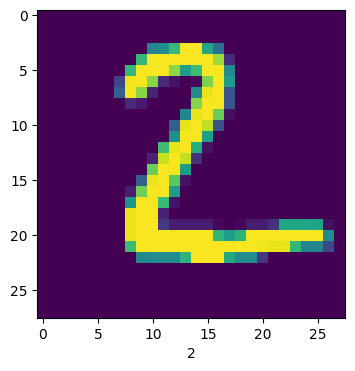

In [40]:
plot_digit(Xtest,ytest,1)

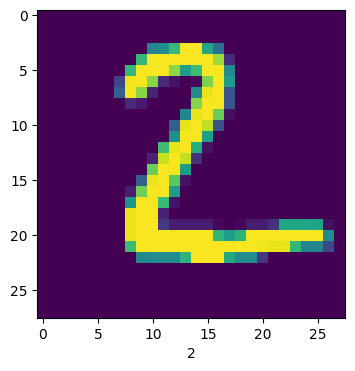

In [41]:
plot_digit(Xtest,ypred,1)